# **TASK 1: IMPLEMENT A NEURAL NETWORK**

In [ ]:
!pip install numpy pandas scikit-learn matplotlib tensorflow

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/iris.csv')

In [ ]:
# Step 2: Preprocess the data
# Separate features and target
X = df.iloc[:, :-1].values  # All columns except last
y = df.iloc[:, -1].values   # Last column (species)

In [ ]:
# Encode species labels to integers (0, 1, 2)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [ ]:
# Convert to one-hot encoding
y_onehot = to_categorical(y_encoded)

In [ ]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Step 3: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_onehot,
    test_size=0.2,
    random_state=42,
    stratify=y_onehot  # Maintain class distribution in splits
)

In [ ]:
# Step 4: Build the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(4,)),  # Input layer (4 features) + hidden layer
    Dense(32, activation='relu'),                   # Hidden layer
    Dense(3, activation='softmax')                  # Output layer (3 classes)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Step 5: Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Step 6: Train the model with validation
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=16,
    validation_split=0.2,
    verbose=1
)

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.4446 - loss: 1.1398 - val_accuracy: 0.5833 - val_loss: 0.9960
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7000 - loss: 0.9894 - val_accuracy: 0.6667 - val_loss: 0.8982
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7811 - loss: 0.8590 - val_accuracy: 0.7500 - val_loss: 0.8224
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7817 - loss: 0.7778 - val_accuracy: 0.7500 - val_loss: 0.7606
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8121 - loss: 0.6727 - val_accuracy: 0.7917 - val_loss: 0.7085
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8378 - loss: 0.5931 - val_accuracy: 0.7917 - val_loss: 0.6635
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7720 - loss: 0.5698 - val_accuracy: 0.7917 - val_loss: 0.6245
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7845 - loss: 0.5040 - val_accuracy: 0.7917 - val_loss:

In [ ]:
# Step 7: Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Accuracy: {accuracy*100:.2f}%")


Test Accuracy: 96.67%


In [ ]:
# Manual verification
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

# Print some examples
print("\nSample Predictions:")
for i in range(5):
    print(f"Sample {i+1}:")
    print(f"  Features: {X_test[i]}")
    print(f"  True: {label_encoder.inverse_transform([true_classes[i]])[0]}")
    print(f"  Pred: {label_encoder.inverse_transform([predicted_classes[i]])[0]}")
    print(f"  Confidence: {np.max(predictions[i]):.2f}")
    print()

# Calculate manual accuracy
manual_accuracy = np.mean(predicted_classes == true_classes)
print(f"Manual Accuracy Check: {manual_accuracy*100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step

Sample Predictions:
Sample 1:
  Features: [ 0.18982966 -0.1249576   0.59216153  0.79059079]
  True: virginica
  Pred: virginica
  Confidence: 0.62

Sample 2:
  Features: [-0.7795133   1.03205722 -1.2844067  -1.31297673]
  True: setosa
  Pred: setosa
  Confidence: 1.00

Sample 3:
  Features: [-1.14301691 -1.51337539 -0.26082403 -0.26119297]
  True: versicolor
  Pred: versicolor
  Confidence: 1.00

Sample 4:
  Features: [-1.02184904 -1.74477836 -0.26082403 -0.26119297]
  True: versicolor
  Pred: versicolor
  Confidence: 1.00

Sample 5:
  Features: [-0.05250608 -0.8191665   0.76275864  0.92206376]
  True: virginica
  Pred: virginica
  Confidence: 0.99

Manual Accuracy Check: 96.67%


In [ ]:
# Step 8: Plot training history
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

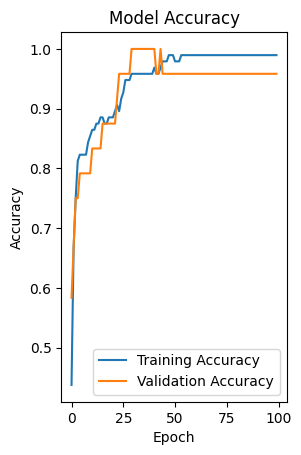

In [ ]:
# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

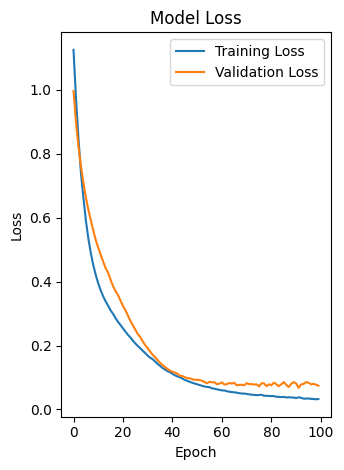

In [ ]:
# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()